In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.figsize'] = 10, 15
import matplotlib.pyplot as plt
import rawpy
import numpy as np

In [2]:
raw = rawpy.imread("./hq_cam_color_checker_new.dng")
# raw image displayed with no margin
bayer = raw.raw_image_visible.copy()
raw.close()

In [3]:
 def get_bayer_color(bayer, y1, y2, x1, x2):
    red = []
    green = []
    blue = []
    black_level = 256
    for y in range(y1, y2):
        for x in range(x1, x2):
            if y%2==0:
                if x%2==0:
                    blue.append(bayer[y][x]-black_level)
                else:
                    green.append(bayer[y][x]-black_level)
            else:
                if x%2==0:
                    green.append(bayer[y][x]-black_level)
                else:
                    red.append(bayer[y][x]-black_level)
    
    return red, green, blue

In [ ]:
plt.hist(np.log10(red) ,alpha=0.5, label='R', color='r')
plt.hist(np.log10(green) ,alpha=0.5, label='G', color='g')
plt.hist(np.log10(blue) ,alpha=0.5, label='B', color='b')
plt.legend(loc='upper left')
plt.show()

In [4]:
# A1 - F4
dict_cc_field = {"A1":[250,750, 50,550],
                "A2":[950,1450, 50,550],
                "A3":[1600,2100, 50,550],
                "A4":[2300,2800, 50,550],
                "B1":[250,750, 750,1250],
                "B2":[950,1450, 750,1250],
                "B3":[1600,2100, 750,1250],
                "B4":[2300,2800, 750,1250],
                "C1":[250,750, 1400,1900],
                "C2":[950,1450, 1400,1900],
                "C3":[1600,2100, 1400,1900],
                "C4":[2300,2800, 1400,1900],
                "D1":[250,750, 2050,2550],
                "D2":[950,1450, 2050,2550],
                "D3":[1600,2100, 2050,2550],
                "D4":[2300,2800, 2050,2550],
                "E1":[250,750, 2750,3250],
                "E2":[950,1450, 2750,3250],
                "E3":[1600,2100, 2750,3250],
                "E4":[2300,2800, 2750,3250],
                "F1":[250,750, 3450,3950],
                "F2":[950,1450, 3450,3950],
                "F3":[1600,2100, 3450,3950],
                "F4":[2300,2800, 3450,3950]
                }

In [ ]:
# blue green red gray_card
tiles = ["A3", "B3", "C3", "D4"]

for i, tile in enumerate(tiles):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_bayer_color(bayer, y1, y2, x1, x2)
        plt.hist(np.log10(red) ,alpha=0.5, label='R', color='r')
        plt.hist(np.log10(green) ,alpha=0.5, label='G', color='g')
        plt.hist(np.log10(blue) ,alpha=0.5, label='B', color='b')
        plt.legend(loc='upper left')
        plt.savefig(f'./Documents/{tile}.png')
        plt.show()


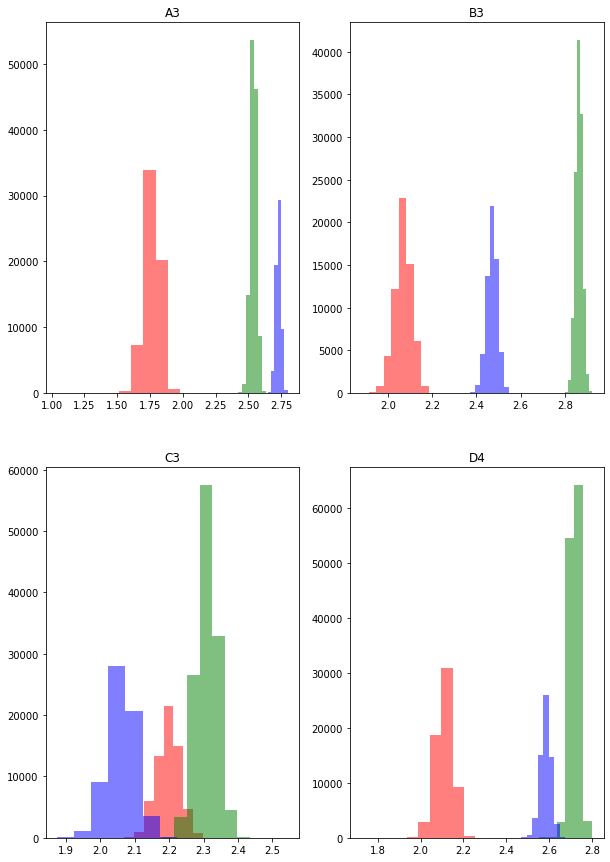

In [10]:
# blue green red gray_card
tiles = ["A3", "B3", "C3", "D4"]

# plot data with subplots
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

for i, tile in enumerate(tiles):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_bayer_color(bayer, y1, y2, x1, x2)
        if i==0:
            ax1.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")


plt.savefig(f'./Documents/subplots_4_title.png')
plt.show()